TensorFlow Version: 2.20.0

--- Loading Dataset ---
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step

--- Data Exploration ---
Training Images Shape: (60000, 28, 28)
Test Images Shape: (10000, 28, 28)
Sample Image Data Type: uint8
Max Pixel Value: 255
Number of classes: 10


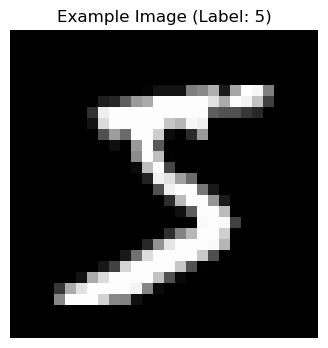


--- Data Pre-processing ---
Images normalized (0-1).
Labels converted to One-Hot Encoding. Shape: (60000, 10)


C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


--- Training Baseline Model (5 Epochs) ---
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9278 - loss: 0.2434 - val_accuracy: 0.9639 - val_loss: 0.1136
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9684 - loss: 0.1027 - val_accuracy: 0.9688 - val_loss: 0.1016
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9774 - loss: 0.0728 - val_accuracy: 0.9766 - val_loss: 0.0806
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9823 - loss: 0.0553 - val_accuracy: 0.9711 - val_loss: 0.0918
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9860 - loss: 0.0438 - val_accuracy: 0.9801 - val_loss: 0.0718

--- Final Model Evaluation ---

Baseline Model Test Loss: 0.0718
Baseline Model Test Accuracy: 98.01%


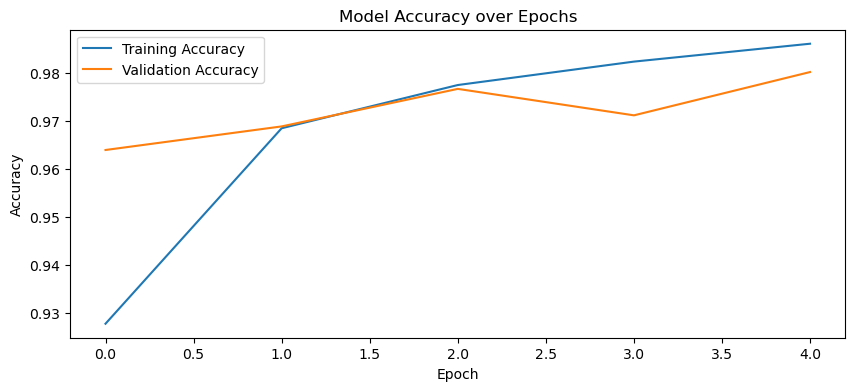

In [1]:
# ==============================================================================
# 1. SETUP AND DATA LOADING
# ==============================================================================
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow Version: {tf.__version__}")

# Load the MNIST dataset directly from Keras
print("\n--- Loading Dataset ---")
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# ==============================================================================
# 2. DATA EXPLORATION (EDA)
# ==============================================================================
print("\n--- Data Exploration ---")
print(f"Training Images Shape: {train_images.shape}")
print(f"Test Images Shape: {test_images.shape}")
print(f"Sample Image Data Type: {train_images.dtype}")
print(f"Max Pixel Value: {np.max(train_images)}")
print(f"Number of classes: {len(np.unique(train_labels))}")

# Display a sample image
plt.figure(figsize=(4, 4))
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Example Image (Label: {train_labels[0]})")
plt.axis('off')
plt.show()

# ==============================================================================
# 3. DATA PRE-PROCESSING
# ==============================================================================
print("\n--- Data Pre-processing ---")

# Normalization: Scale pixel values from 0-255 to 0-1.
# This helps the neural network train faster and more reliably.
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
print("Images normalized (0-1).")

# One-Hot Encoding: Convert integer labels (0-9) into binary vectors.
# E.g., '4' becomes [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
num_classes = 10
train_labels_one_hot = to_categorical(train_labels, num_classes=num_classes)
test_labels_one_hot = to_categorical(test_labels, num_classes=num_classes)
print(f"Labels converted to One-Hot Encoding. Shape: {train_labels_one_hot.shape}")


# ==============================================================================
# 4. BUILDING THE BASELINE FEEDFORWARD MODEL
# ==============================================================================
# The input image (28x28) must be flattened into a single vector (784 features)
# for the dense layers.

model = Sequential([
    # Input Layer: Flattens the 28x28 image into a 784-dimensional vector.
    Flatten(input_shape=(28, 28)), 
    
    # Hidden Layer 1: Dense layer with 128 neurons and ReLU activation.
    Dense(128, activation='relu'),
    
    # Hidden Layer 2: Dense layer with 64 neurons and ReLU activation.
    Dense(64, activation='relu'),
    
    # Output Layer: Dense layer with 10 neurons (one for each class).
    # Softmax ensures the output is a probability distribution (sums to 1).
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Used for multi-class classification
              metrics=['accuracy'])

# Display the model summary
model.summary()

# ==============================================================================
# 5. MODEL TRAINING
# ==============================================================================
print("\n--- Training Baseline Model (5 Epochs) ---")

history = model.fit(
    train_images, 
    train_labels_one_hot, 
    epochs=5,           # Number of passes over the entire training dataset
    batch_size=32,      # Number of samples per gradient update
    validation_data=(test_images, test_labels_one_hot) # Use test data for validation check during training
)

# ==============================================================================
# 6. MODEL EVALUATION AND BASELINE RESULT
# ==============================================================================
print("\n--- Final Model Evaluation ---")

# Evaluate the model on the unseen test data
loss, accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=0)

print(f"\nBaseline Model Test Loss: {loss:.4f}")
print(f"Baseline Model Test Accuracy: {accuracy*100:.2f}%")

# Plotting the training history (optional, but good for reporting)
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ------------------------------------------------------------------------------
# CONGRATULATIONS!
# This completes Notebook 1. The baseline model achieved an accuracy of around 97-98%.
# Next, we will use a Convolutional Neural Network (CNN) in Notebook 2 
# to try and improve this result!
# ------------------------------------------------------------------------------

In [1]:
# ==============================================================================
# 1. SETUP AND DATA LOADING
# ==============================================================================
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow Version: {tf.__version__}")

# Load the MNIST dataset directly from Keras
print("\n--- Loading Dataset ---")
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

TensorFlow Version: 2.20.0

--- Loading Dataset ---


In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
# ==============================================================================
# 2. DATA PRE-PROCESSING FOR CNN
# ==============================================================================
print("\n--- Data Pre-processing for CNN ---")

# Normalization (Scaling pixel values from 0-255 to 0-1)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshaping for CNN Input: 
# CNNs expect a 4D array: (samples, height, width, channels).
# MNIST images are grayscale (1 channel), so we add a channel dimension.
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
print(f"Reshaped Training Data Shape: {train_images.shape}")
print(f"Reshaped Test Data Shape: {test_images.shape}")

# One-Hot Encoding (Converting integer labels to binary vectors)
num_classes = 10
train_labels_one_hot = to_categorical(train_labels, num_classes=num_classes)
test_labels_one_hot = to_categorical(test_labels, num_classes=num_classes)
print(f"Labels converted to One-Hot Encoding. Shape: {train_labels_one_hot.shape}")


--- Data Pre-processing for CNN ---
Reshaped Training Data Shape: (60000, 28, 28, 1)
Reshaped Test Data Shape: (10000, 28, 28, 1)
Labels converted to One-Hot Encoding. Shape: (60000, 10)


In [4]:
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28, 1)
float32


In [5]:
print(train_images[0].max())
print(train_images[0].min())

1.0
0.0


In [6]:
# ==============================================================================
# 3. BUILDING THE CNN MODEL ARCHITECTURE
# ==============================================================================

model = Sequential([
    # First CONVOLUTIONAL Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    
    # Second CONVOLUTIONAL Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Dropout (Optional but Recommended)
    Dropout(0.25),
    
    # Classification Head (Dense Layers)
    Flatten(),
    
    # Hidden Dense Layer
    Dense(128, activation='relu'),
    
    # Output Layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# ==============================================================================
# 4. MODEL TRAINING
# ==============================================================================
print("\n--- Training CNN Model (10 Epochs) ---")

history = model.fit(
    train_images, 
    train_labels_one_hot, 
    epochs=10, 
    batch_size=64, 
    validation_data=(test_images, test_labels_one_hot) 
)


--- Training CNN Model (10 Epochs) ---
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9478 - loss: 0.1716 - val_accuracy: 0.9847 - val_loss: 0.0478
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9830 - loss: 0.0566 - val_accuracy: 0.9856 - val_loss: 0.0439
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9868 - loss: 0.0413 - val_accuracy: 0.9899 - val_loss: 0.0301
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9900 - loss: 0.0317 - val_accuracy: 0.9903 - val_loss: 0.0280
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9918 - loss: 0.0245 - val_accuracy: 0.9917 - val_loss: 0.0251
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9930 - loss: 0.0210 - val_accuracy: 0.9912 - val_loss: 0.0269
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.9914 - val_loss: 0.0266
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/s

In [8]:

print(model.optimizer.get_config()['learning_rate'])

0.0010000000474974513



--- Final Model Evaluation ---

CNN Model Test Loss: 0.0330
CNN Model Test Accuracy: 99.18%


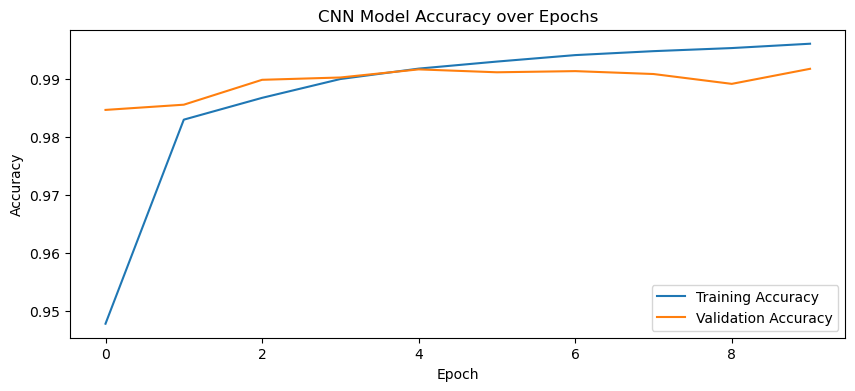

In [9]:
# ==============================================================================
# 5. FINAL MODEL EVALUATION AND ANALYSIS
# ==============================================================================
print("\n--- Final Model Evaluation ---")

# Evaluate the model on the unseen test data
loss, accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=0)

print(f"\nCNN Model Test Loss: {loss:.4f}")
print(f"CNN Model Test Accuracy: {accuracy*100:.2f}%")

# Plotting the training history
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()